In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from mpl_toolkits.basemap import Basemap
import numpy as np

import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag


%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

In [3]:
gauss_coef = pd.read_csv('gauss_coefs.dat', skiprows=2, delim_whitespace=True, dtype=float)
gauss_coef = gauss_coef.ix[gauss_coef['t_step']<2800000.]
gauss_coef.reset_index(drop=True, inplace=True)

In [4]:
gauss_coef.tail()

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
1994,2799500.0,1.39975,-0.000621,0.032103,-0.000334,0.000018,-0.000815,0.000114,0.000513,0.000552,0.000078,0.000060,0.000093,-0.000774,-0.000050,0.000074,0.000231
1995,2799600.0,1.39980,-0.000615,0.032101,-0.000341,0.000010,-0.000809,0.000116,0.000518,0.000552,0.000077,0.000063,0.000090,-0.000776,-0.000051,0.000073,0.000233
1996,2799700.0,1.39985,-0.000610,0.032099,-0.000348,0.000003,-0.000803,0.000118,0.000522,0.000552,0.000076,0.000067,0.000088,-0.000778,-0.000051,0.000073,0.000235
1997,2799800.0,1.39990,-0.000605,0.032098,-0.000355,-0.000004,-0.000798,0.000119,0.000527,0.000551,0.000075,0.000070,0.000086,-0.000780,-0.000052,0.000072,0.000237
1998,2799900.0,1.39995,-0.000601,0.032097,-0.000362,-0.000011,-0.000792,0.000120,0.000531,0.000551,0.000075,0.000074,0.000084,-0.000782,-0.000052,0.000072,0.000239


In [5]:
# gauss_coef = gauss_coef.ix[gauss_coef['t_step']<=3000000.].ix[gauss_coef['t_step']>=2900000.]
# gauss_coef = gauss_coef.ix[gauss_coef['t_step']>=2800000.]

In [6]:
# phi = np.linspace(0, np.pi, 100)
# theta = np.linspace(0, 2*np.pi, 100)
# phi, theta = np.meshgrid(phi, theta)

# # The Cartesian coordinates of the unit sphere
# x = np.sin(phi) * np.cos(theta)
# y = np.sin(phi) * np.sin(theta)
# z = np.cos(phi)

# try:
#     del fcolors
# except:
#     pass

# for (l, m) in [(1, 1), (2, 2), (2, 1), (2, 0), (3, 3), (3, 2), (3, 1), (3, 0)]:#, (1, 0)
#     g_coef = gauss_coef['g{0}_{1}'.format(l, m)].tolist()
#     try:
#         h_coef = gauss_coef['h{0}_{1}'.format(l, m)].tolist()
#     except:
#         h_coef = [0]*len(g_coef)
#     try:
#         fcolors += (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
#     except:
#         fcolors = (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
# fmax, fmin = fcolors.max(), fcolors.min()
# fcolors = (fcolors - fmin)/(fmax - fmin)

# # Set the aspect ratio to 1 so our sphere looks spherical
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# # Turn off the axis planes
# ax.set_axis_off()
# # plt.title('m={0}, n={1}'.format(m,l), fontsize='x-large', position=(0.5,0.86))
# plt.tight_layout()
# # plt.savefig('sph_harm_m{0}_n{1}.pdf'.format(m,l))
# plt.show()

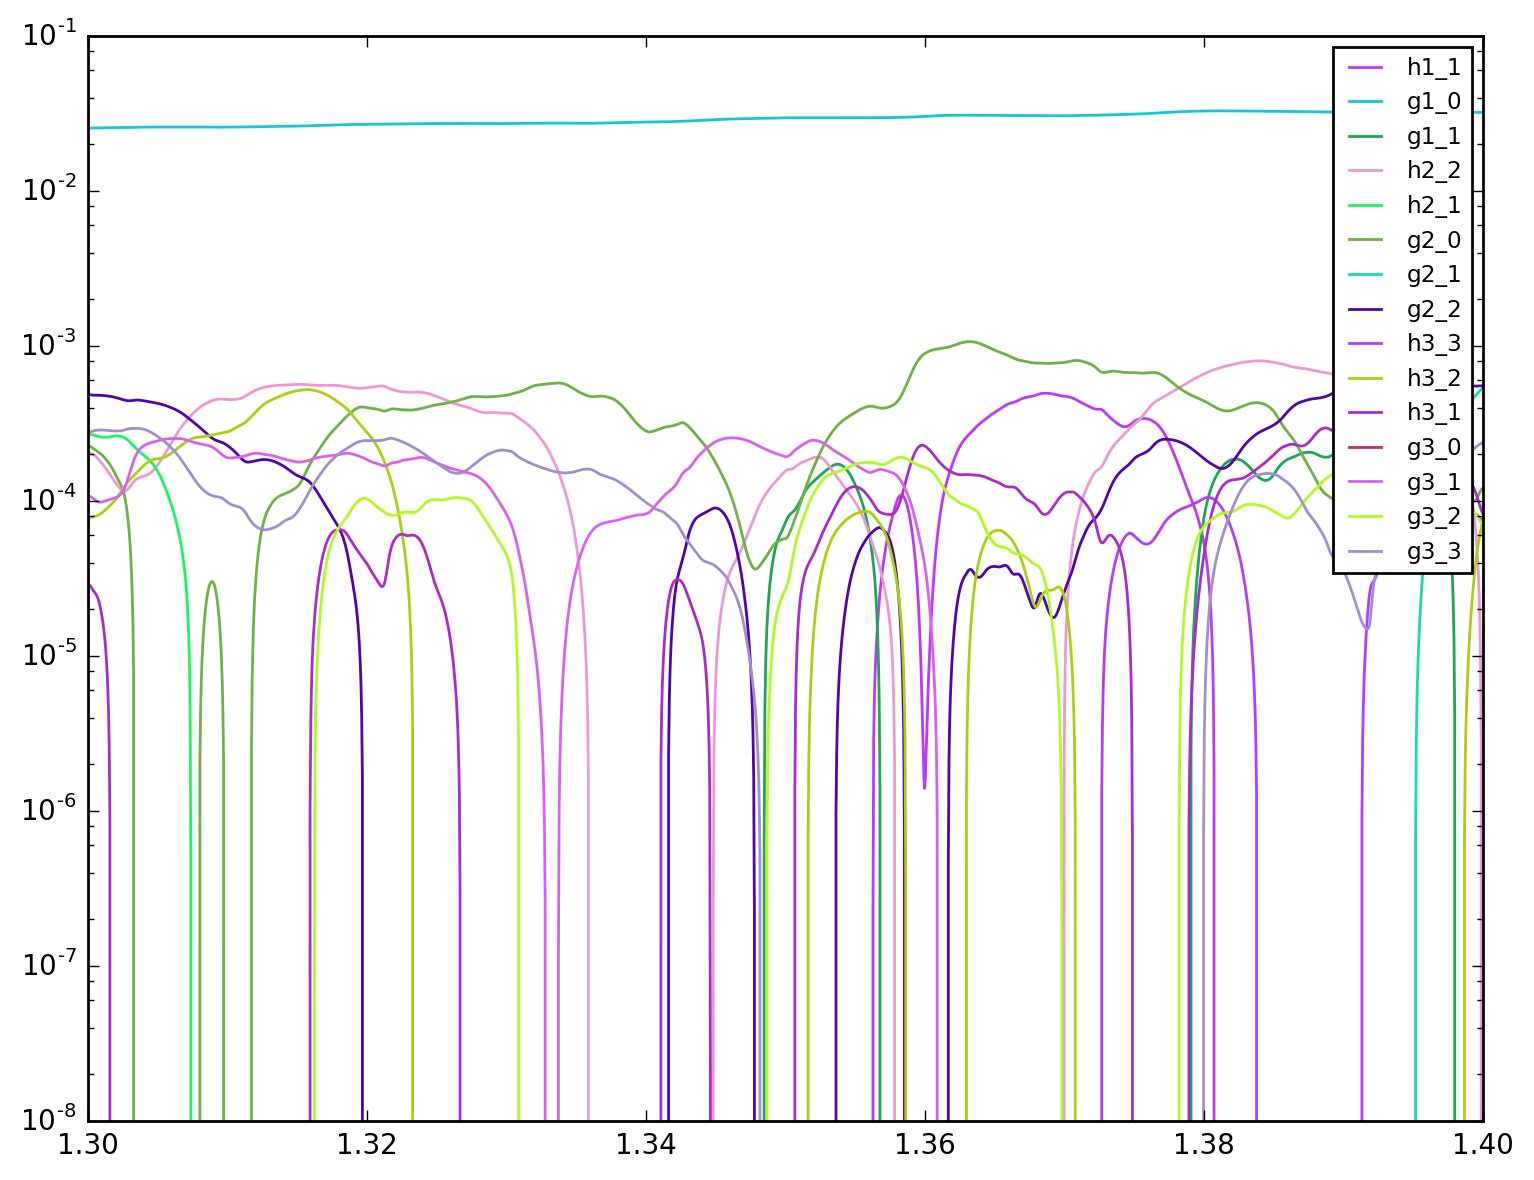

In [7]:
plt.figure(figsize=(9,7))
for column in gauss_coef.columns[2:].tolist():
    plt.plot(gauss_coef.time.tolist(), gauss_coef[column].tolist(), c = np.random.rand(3), label=column)
plt.legend(fontsize='small')
plt.yscale('log')
# plt.xlim(gauss_coef.time.min(), gauss_coef.time.max())
plt.savefig('gauss_coef_plot.pdf')
plt.show()

In [8]:
max(gauss_coef['h1_1'].tolist())/np.average(gauss_coef['g1_0'].tolist())

0.016969690672912562

In [9]:
gauss_coef_trimmed = gauss_coef[gauss_coef.columns[1:].tolist()]
gauss_coef_trimmed.set_index('time', inplace=True)

In [10]:
by_pole = pd.DataFrame(columns=['time', 'dipole', 'quadrupole', 'octupole'])

In [11]:
for i in range(len(gauss_coef_trimmed)):
    time_index = gauss_coef_trimmed.index[i]
    by_pole.set_value(i, 'time', time_index)
    by_pole.set_value(i, 
                      'dipole', 
                      np.sqrt((gauss_coef_trimmed.h1_1[time_index])**2 + 
                              (gauss_coef_trimmed.g1_0[time_index])**2 + 
                              (gauss_coef_trimmed.g1_1[time_index])**2))
    by_pole.set_value(i, 
                      'quadrupole', 
                      np.sqrt((gauss_coef_trimmed.h2_2[time_index])**2 + 
                              (gauss_coef_trimmed.h2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_0[time_index])**2 + 
                              (gauss_coef_trimmed.g2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_2[time_index])**2))
    by_pole.set_value(i, 
                      'octupole', 
                      np.sqrt((gauss_coef_trimmed.h3_3[time_index])**2 + 
                              (gauss_coef_trimmed.h3_2[time_index])**2 + 
                              (gauss_coef_trimmed.h3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_0[time_index])**2 + 
                              (gauss_coef_trimmed.g3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_2[time_index])**2 + 
                              (gauss_coef_trimmed.g3_3[time_index])**2))

In [12]:
by_pole.set_index(['time'], inplace=True)

In [13]:
by_pole.head()

,dipole,quadrupole,octupole
time,,,
1.30005,0.0254416,0.00101248,0.000671226
1.30010,0.0254451,0.00100727,0.000671982
1.30015,0.0254488,0.0010019,0.000672731
1.30020,0.0254527,0.000996299,0.000673463
1.30025,0.0254568,0.000990432,0.000674191


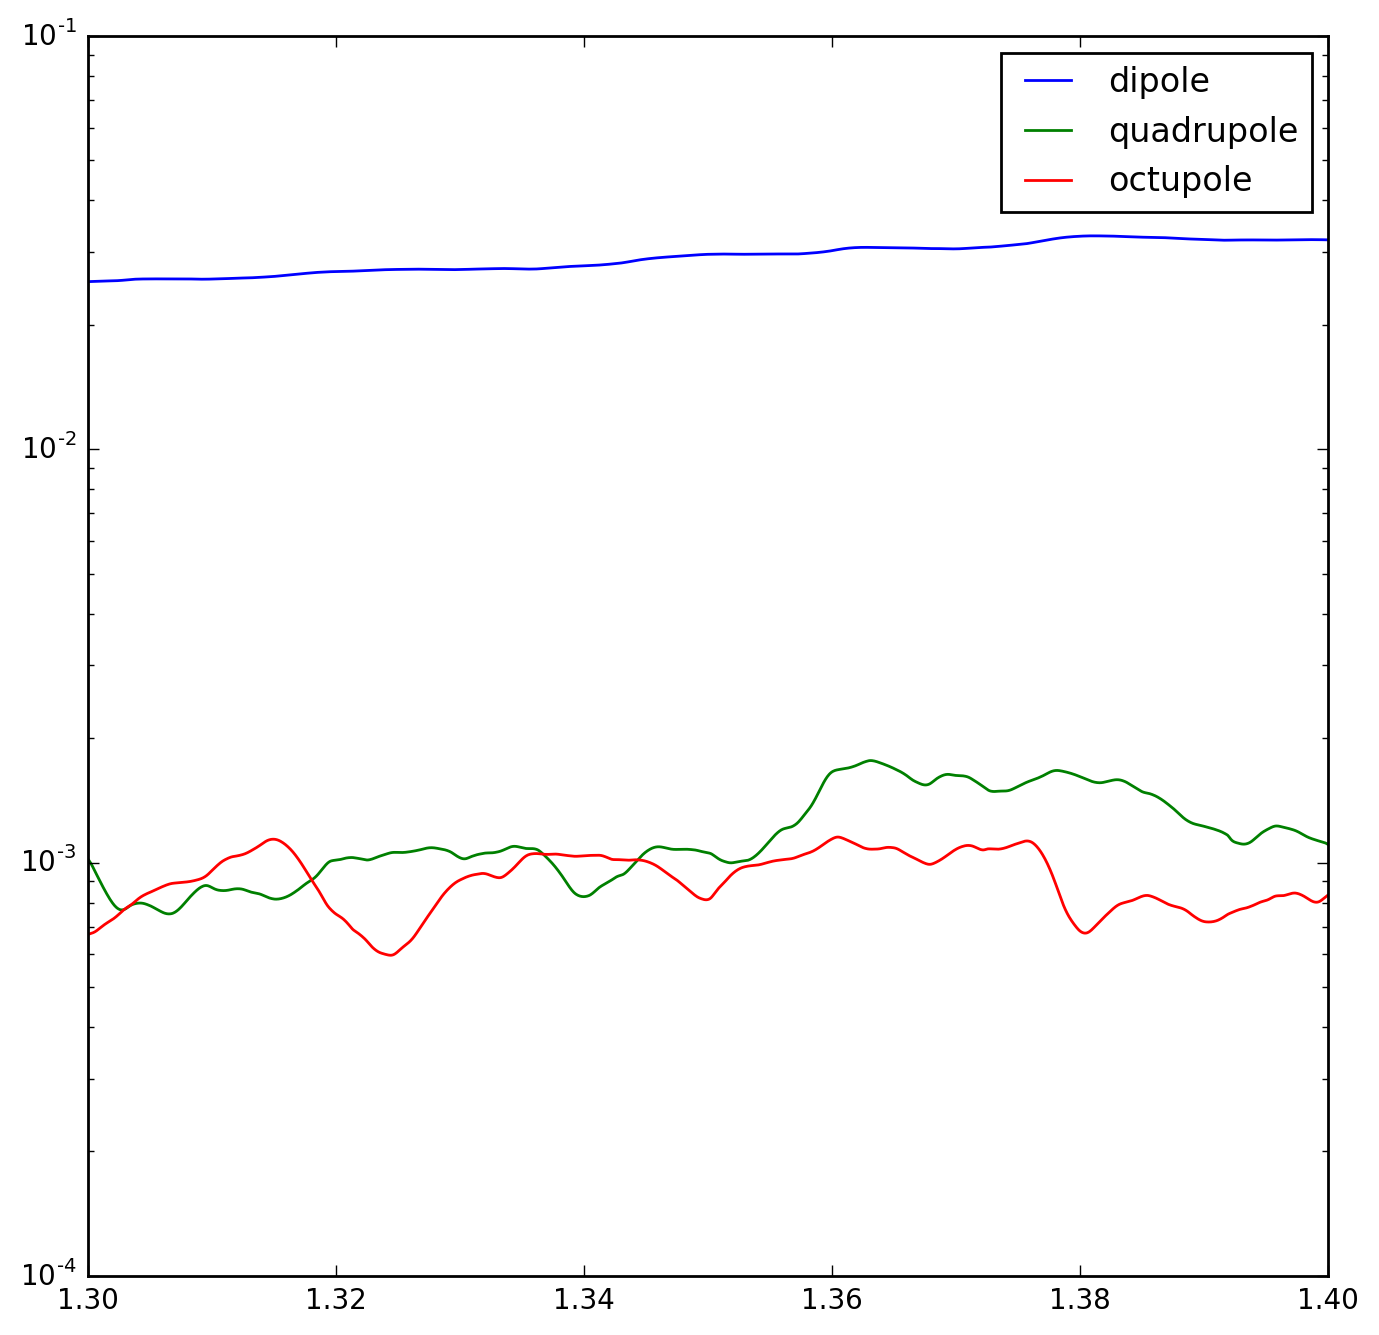

In [14]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.plot(by_pole.index.tolist(), by_pole.quadrupole.tolist(), label='quadrupole')
plt.plot(by_pole.index.tolist(), by_pole.octupole.tolist(), label='octupole')
plt.yscale('log')
plt.legend()
plt.show()

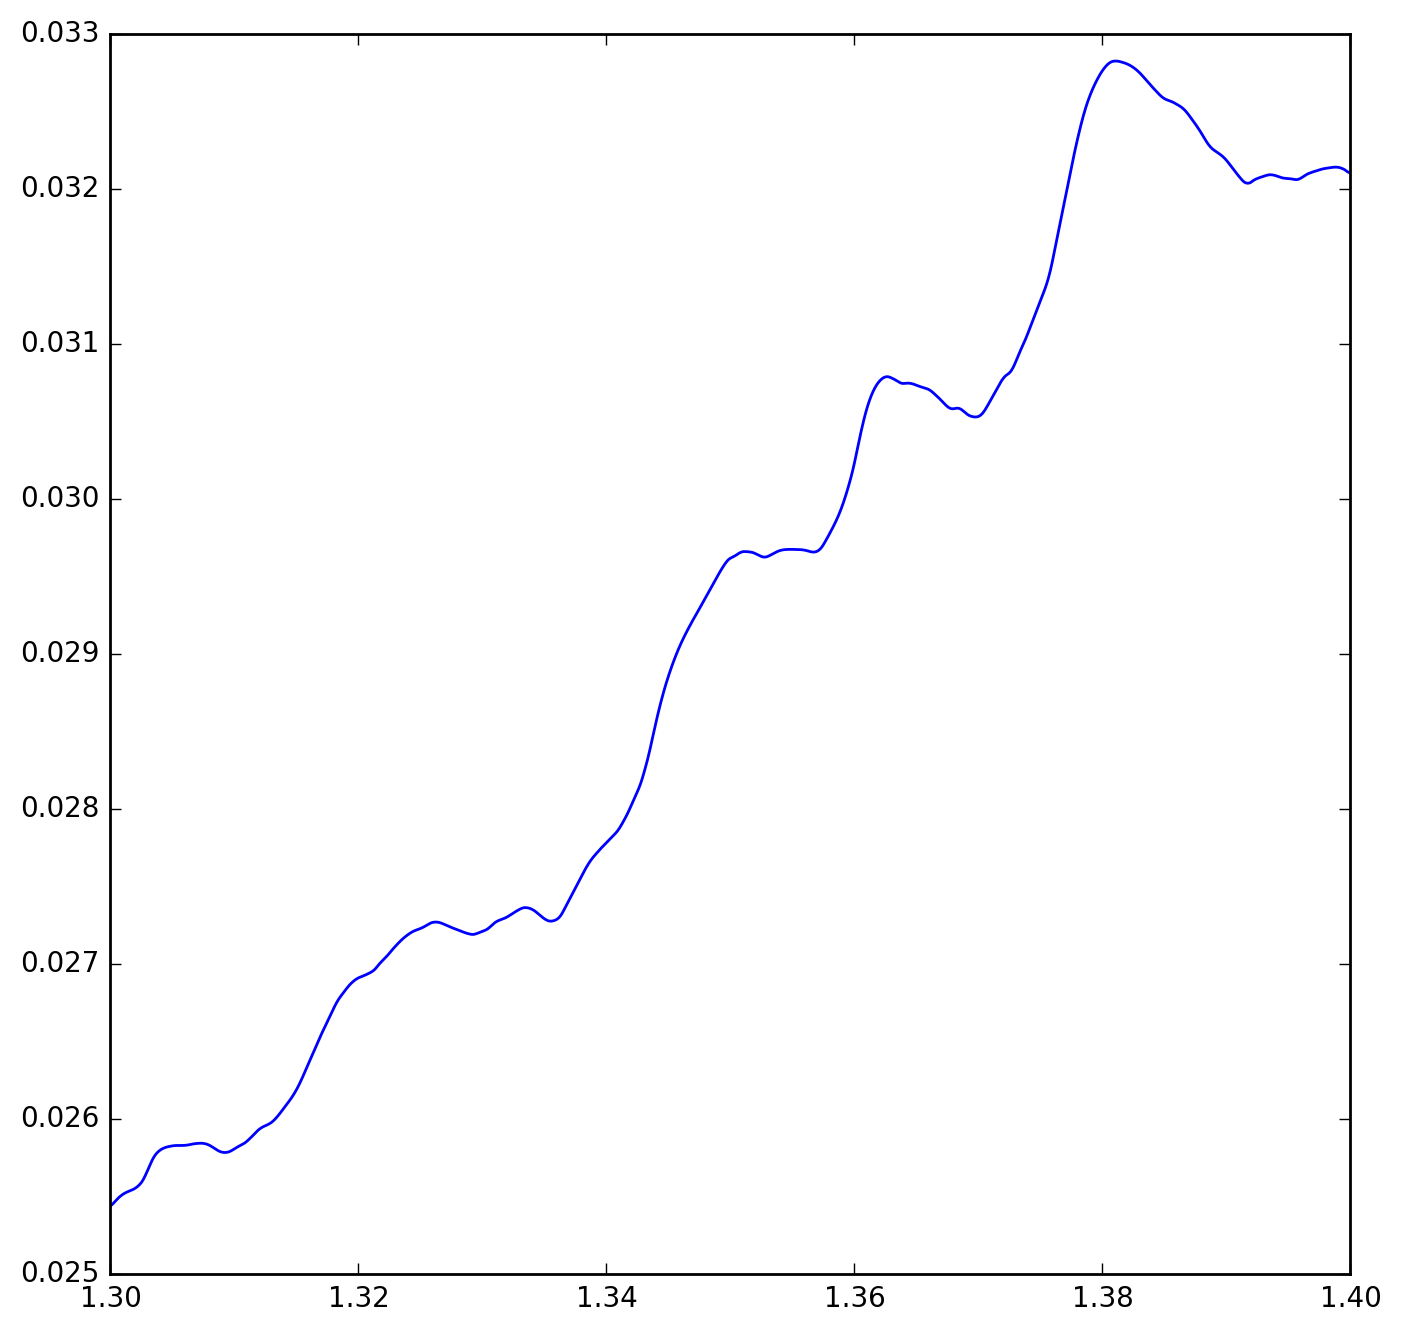

In [15]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.show()

In [16]:
gauss_coef.reset_index(drop=True, inplace=True)

In [17]:
t_0 = list(gauss_coef.ix[0, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])

In [18]:
gauss_coef

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
0,2600100.0,1.30005,-0.000163,0.025432,-0.000667,0.000205,0.000270,0.000227,-0.000789,0.000486,-0.000058,7.800854e-05,0.000029,-0.000570,0.000107,-0.000166,0.000277
1,2600200.0,1.30010,-0.000163,0.025436,-0.000667,0.000204,0.000269,0.000226,-0.000784,0.000485,-0.000060,7.824531e-05,0.000029,-0.000571,0.000107,-0.000164,0.000278
2,2600300.0,1.30015,-0.000163,0.025439,-0.000667,0.000203,0.000268,0.000224,-0.000779,0.000484,-0.000062,7.847049e-05,0.000028,-0.000571,0.000107,-0.000162,0.000279
3,2600400.0,1.30020,-0.000163,0.025443,-0.000668,0.000202,0.000268,0.000223,-0.000773,0.000483,-0.000065,7.866653e-05,0.000028,-0.000572,0.000106,-0.000160,0.000280
4,2600500.0,1.30025,-0.000163,0.025448,-0.000668,0.000201,0.000267,0.000221,-0.000767,0.000482,-0.000067,7.882780e-05,0.000027,-0.000573,0.000105,-0.000158,0.000281
5,2600600.0,1.30030,-0.000163,0.025452,-0.000668,0.000200,0.000267,0.000219,-0.000760,0.000481,-0.000070,7.896370e-05,0.000027,-0.000574,0.000105,-0.000156,0.000282
6,2600700.0,1.30035,-0.000163,0.025456,-0.000669,0.000199,0.000266,0.000218,-0.000753,0.000481,-0.000072,7.909200e-05,0.000026,-0.000575,0.000104,-0.000153,0.000283
7,2600800.0,1.30040,-0.000163,0.025461,-0.000670,0.000198,0.000266,0.000216,-0.000746,0.000481,-0.000075,7.922980e-05,0.000026,-0.000576,0.000103,-0.000151,0.000283
8,2600900.0,1.30045,-0.000164,0.025465,-0.000670,0.000196,0.000265,0.000215,-0.000738,0.000481,-0.000077,7.938887e-05,0.000026,-0.000577,0.000102,-0.000149,0.000284
9,2601000.0,1.30050,-0.000164,0.025469,-0.000671,0.000195,0.000264,0.000213,-0.000731,0.000481,-0.000080,7.957615e-05,0.000025,-0.000578,0.000101,-0.000148,0.000285


In [19]:
gauss_coef.reset_index(drop=True, inplace=True)

In [20]:
gauss_coef

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
0,2600100.0,1.30005,-0.000163,0.025432,-0.000667,0.000205,0.000270,0.000227,-0.000789,0.000486,-0.000058,7.800854e-05,0.000029,-0.000570,0.000107,-0.000166,0.000277
1,2600200.0,1.30010,-0.000163,0.025436,-0.000667,0.000204,0.000269,0.000226,-0.000784,0.000485,-0.000060,7.824531e-05,0.000029,-0.000571,0.000107,-0.000164,0.000278
2,2600300.0,1.30015,-0.000163,0.025439,-0.000667,0.000203,0.000268,0.000224,-0.000779,0.000484,-0.000062,7.847049e-05,0.000028,-0.000571,0.000107,-0.000162,0.000279
3,2600400.0,1.30020,-0.000163,0.025443,-0.000668,0.000202,0.000268,0.000223,-0.000773,0.000483,-0.000065,7.866653e-05,0.000028,-0.000572,0.000106,-0.000160,0.000280
4,2600500.0,1.30025,-0.000163,0.025448,-0.000668,0.000201,0.000267,0.000221,-0.000767,0.000482,-0.000067,7.882780e-05,0.000027,-0.000573,0.000105,-0.000158,0.000281
5,2600600.0,1.30030,-0.000163,0.025452,-0.000668,0.000200,0.000267,0.000219,-0.000760,0.000481,-0.000070,7.896370e-05,0.000027,-0.000574,0.000105,-0.000156,0.000282
6,2600700.0,1.30035,-0.000163,0.025456,-0.000669,0.000199,0.000266,0.000218,-0.000753,0.000481,-0.000072,7.909200e-05,0.000026,-0.000575,0.000104,-0.000153,0.000283
7,2600800.0,1.30040,-0.000163,0.025461,-0.000670,0.000198,0.000266,0.000216,-0.000746,0.000481,-0.000075,7.922980e-05,0.000026,-0.000576,0.000103,-0.000151,0.000283
8,2600900.0,1.30045,-0.000164,0.025465,-0.000670,0.000196,0.000265,0.000215,-0.000738,0.000481,-0.000077,7.938887e-05,0.000026,-0.000577,0.000102,-0.000149,0.000284
9,2601000.0,1.30050,-0.000164,0.025469,-0.000671,0.000195,0.000264,0.000213,-0.000731,0.000481,-0.000080,7.957615e-05,0.000025,-0.000578,0.000101,-0.000148,0.000285


In [21]:
# vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
# mean_poles = pd.DataFrame(columns=['site_lat', 'site_lon', 'mean_pole_lat', 'mean_pole_lon', 'mean_pole_A95', 'mean_pole_k', 'actual_pole_lat', 'actual_pole_lon'])
vgps = pd.read_csv('VGPs.csv', usecols=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
mean_poles = pd.read_csv('mean_poles.csv', usecols=['site_lat',
                                                    'site_lon',
                                                    'mean_pole_lat',
                                                    'mean_pole_lon', 
                                                    'mean_pole_A95',
                                                    'actual_pole_lat',
                                                    'actual_pole_lon', 
                                                    'mean_pole_k'])

In [22]:
def pole_figure_appearance(size = (7,7), center_lat = 35, center_lon = 200):
    m = Basemap(projection='ortho',lat_0=center_lat,lon_0=center_lon,resolution='c',
                area_thresh=50000)
    plt.figure(figsize=size)
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    return m

In [23]:
mode, data = pmag.get_igrf12()

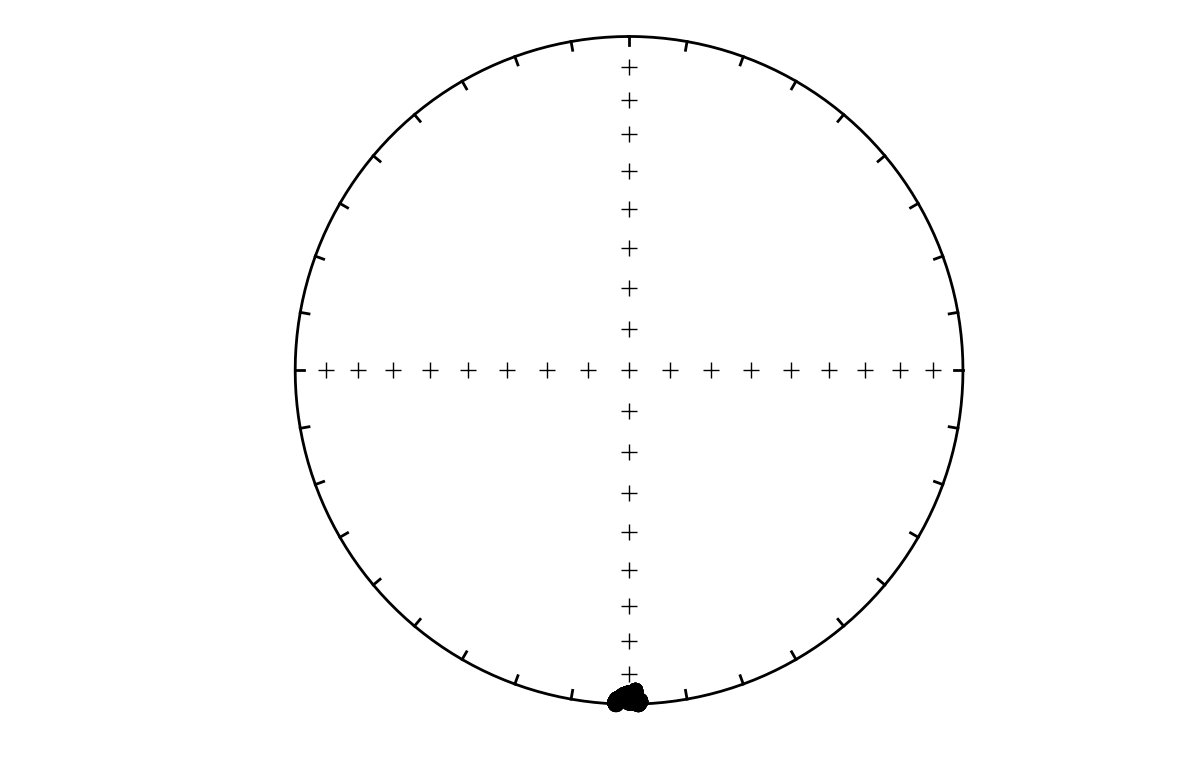

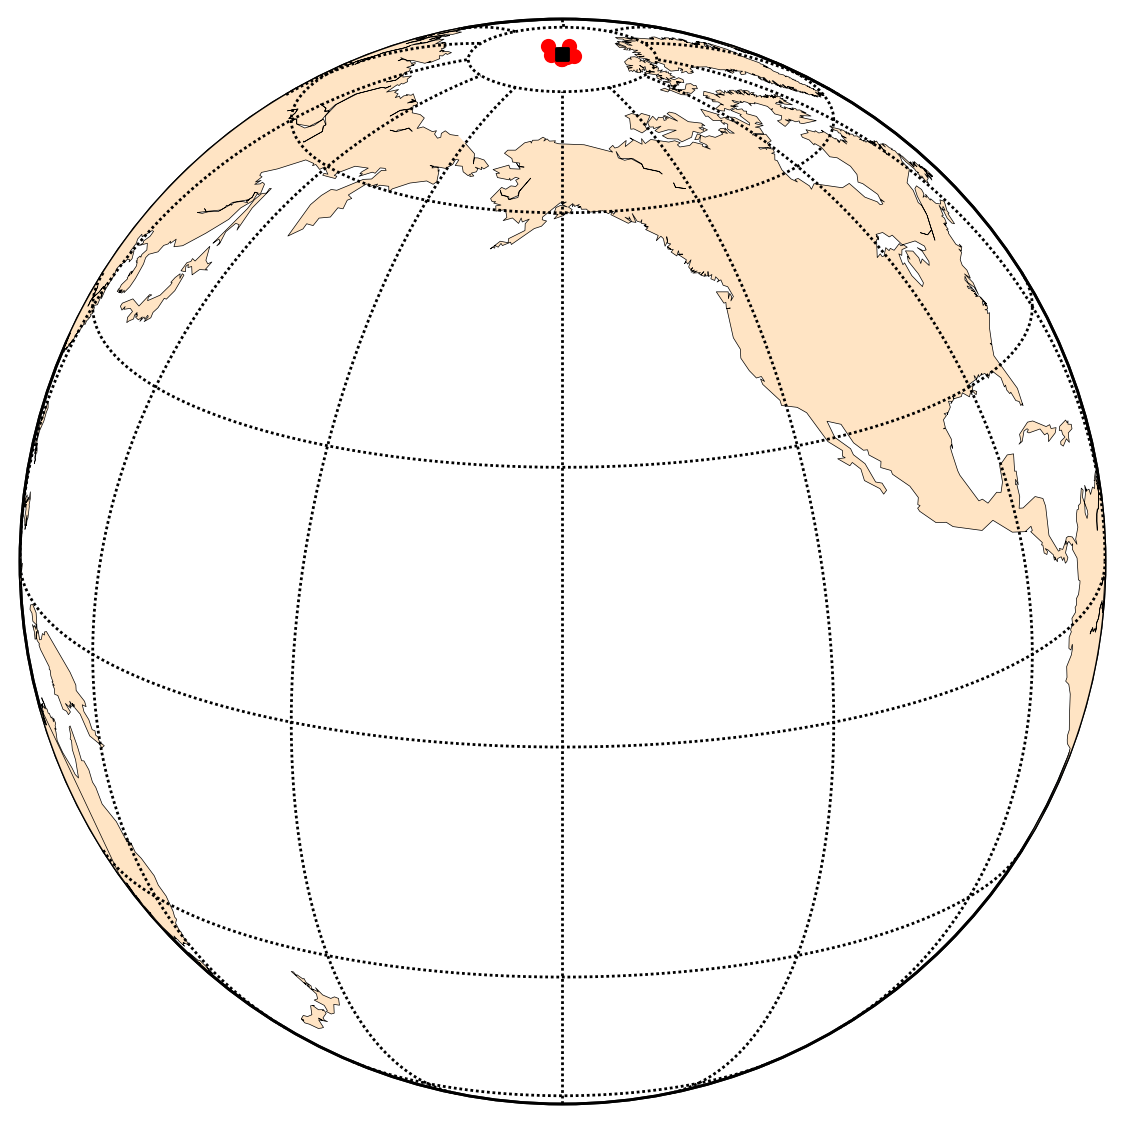

In [31]:
# for lon in range(0, 380, 30):
# for lat in range(-90, 100, 30):
lon = 0
lat = 0

plt.figure(1)
ipmag.plot_net(1)
dec_list = []
inc_list = []
lat_list = []
lon_list = []
for i in range(len(gauss_coef)):
    g_coefs = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])
    block = list(pmag.getvec(g_coefs,lat, lon))
    ipmag.plot_di(block[0], block[1])
    dec_list.append(block[0])
    inc_list.append(block[1])
    lat_list.append(lat)
    lon_list.append(lon)
plt.show()

dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list},columns=['dec', 'inc', 'lat', 'lon'])
ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')
#simulate 8 samples from distribution
sampled_dirs_dec = []
sampled_dirs_inc = []
sampled_dirs_lon = []
sampled_dirs_lat = []
for j in range(10):
    if j==0:
        rand_index = np.random.randint(0, len(gauss_coef)//10)
    else:
        rand_index = np.random.randint(j*len(gauss_coef)//10, (j+1)*len(gauss_coef)//10)
    sampled_dirs_dec.append(dirs_df['dec'].tolist()[rand_index])
    sampled_dirs_inc.append(dirs_df['inc'].tolist()[rand_index])
    sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
    sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

m = pole_figure_appearance(center_lat=20, center_lon=-150)

actual_pole = ipmag.fisher_mean(dirs_df['vgp_lon_rev'].tolist(), dirs_df['vgp_lat_rev'].tolist())

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.savefig('sink_VGPS.svg')
plt.show()

vgps = vgps.append(pd.Series(data = {'dec':sampled_dirs_dec, 'inc':sampled_dirs_inc, 
                              'site_lat':lat, 'site_lon':lon, 
                              'vgp_lat':sampled_dirs_lat, 'vgp_lon':sampled_dirs_lon}), ignore_index=True)
mean_poles = mean_poles.append(pd.Series(data = {'site_lat':lat, 'site_lon':lon, 
                             'mean_pole_lat':mean_pole['inc'], 
                             'mean_pole_lon':mean_pole['dec'], 
                             'mean_pole_A95':mean_pole['alpha95'],
                             'mean_pole_k':mean_pole['k'],
                             'actual_pole_lat':actual_pole['inc'], 
                             'actual_pole_lon':actual_pole['dec']}), ignore_index=True)
mean_poles.to_csv('mean_poles.csv')
vgps.to_csv('VGPs.csv')

In [32]:
mean_pole

{'alpha95': 0.95873588869109172,
 'csd': 1.607206201787396,
 'dec': 205.1709082891968,
 'inc': 89.254013292296491,
 'k': 2539.9597738420662,
 'n': 10,
 'r': 9.9964566367968946}

In [28]:
81/np.sqrt(mean_pole['k'])

1.6277431219567002

In [23]:
mean_poles

,site_lat,site_lon,mean_pole_lat,mean_pole_lon,mean_pole_A95,actual_pole_lat,actual_pole_lon,mean_pole_k
0,0.0,90.0,89.000677,303.939507,0.982253,88.958699,276.964106,NaN
1,45.0,90.0,88.790447,201.832192,1.532230,88.594337,205.044431,NaN
2,45.0,90.0,88.747557,189.234697,1.367320,88.594337,205.044431,1642.251269
3,45.0,90.0,88.066959,202.903556,1.197614,88.594337,205.044431,2140.364042
4,-90.0,90.0,87.001616,53.860876,1.341202,86.831507,54.085935,1706.797569
5,-60.0,90.0,87.837486,326.389297,1.311231,87.669861,330.630706,1785.670710
6,-30.0,90.0,88.035309,314.529035,1.448159,88.003618,309.150370,1464.126193
7,0.0,90.0,88.759582,261.738047,1.259138,88.958699,276.964106,1936.400824
8,30.0,90.0,88.836628,222.623013,1.280257,88.875308,218.493016,1873.073326
9,60.0,90.0,88.688394,219.817142,1.409011,88.192177,208.819934,1546.561250


In [24]:
total_pole_quant = by_pole.dipole.mean() + by_pole.quadrupole.mean() + by_pole.octupole.mean()
G2_frac = by_pole.quadrupole.mean()/total_pole_quant
G3_frac = by_pole.octupole.mean()/total_pole_quant

In [25]:
print G2_frac
print G3_frac

0.0377487753106
0.0291931505842


In [26]:
nothing

NameError: name 'nothing' is not defined

In [ ]:
tk03_lat0 = ipmag.tk03(8, G2=G2_frac, G3=G3_frac)

In [ ]:
tk03_vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon'])
tk03_vgps.dec = ipmag.unpack_di_block(tk03_lat0)[0]
tk03_vgps.inc = ipmag.unpack_di_block(tk03_lat0)[1]
tk03_vgps.site_lat = [0.]*8
tk03_vgps.site_lon = [0.]*8

In [ ]:
ipmag.vgp_calc(tk03_vgps, dec_tc='dec', inc_tc='inc')

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)
mean_pole = ipmag.fisher_mean(tk03_vgps.vgp_lon.tolist(), tk03_vgps.vgp_lat.tolist())
ipmag.plot_vgp(m,tk03_vgps.vgp_lon.tolist(),  tk03_vgps.vgp_lat.tolist(), color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
# m.scatter(lon, lat, latlon=True)
plt.show()

In [ ]:
plt.figure(1)
ipmag.plot_net(1)
dec_list = []
inc_list = []
lat_list = []
lon_list = []
lon=0
for lat in range(-90, 100, 10):
    for i in range(len(gauss_coef)):
        time_step = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']]*1000)
        block = list(pmag.getvec(time_step,lat, lon))
        ipmag.plot_di(block[0], block[1])
        dec_list.append(block[0])
        inc_list.append(block[1])
        lat_list.append(lat)
        lon_list.append(lon)
plt.show()

In [ ]:
mean_poles.to_csv('mean_poles.csv')
vgps.to_csv('VGPs.csv')

In [ ]:
dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list} ,columns=['dec', 'inc', 'lat', 'lon'])

In [ ]:
ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')

In [ ]:
#simulate 8 samples from distribution
sampled_dirs_lon = []
sampled_dirs_lat = []
for j in range(8):
    rand_index = np.random.randint(0, len(gauss_coef))
    sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
    sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()

In [39]:
values = pd.DataFrame(data=[[1200, 1.0, 1.0, 5e-5]], columns=['$Ra$', '$Pr$', '$Pr_m$', '$Ek$'])

In [41]:
print values.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &  \$Ra\$ &  \$Pr\$ &  \$Pr\_m\$ &     \$Ek\$ \\
\midrule
0 &  1200 &   1.0 &     1.0 &  0.00005 \\
\bottomrule
\end{tabular}

